In [421]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [433]:
# 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/머신러닝/playground-series-s3e2/sample_submission.csv', index_col='id')

In [402]:
# 훈련 데이터 확인
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [403]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [404]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [405]:
# 데이터 타입 확인
type(train_data)

pandas.core.frame.DataFrame

In [434]:
# id 컬럼 제거
X = train_data.drop(['id'], axis=1)
y = train_data['stroke']

X_ = test_data.drop(['id'], axis=1)

In [445]:
X_

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
10199,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [446]:
# train 데이터 오브젝트 타입 원-핫 인코딩
obj_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# 모든 범주형 특성을 선택
train_obj_data = X[obj_columns]
# 모든 범주형 특성에 원-핫 인코딩 수행
train_obj_data = pd.get_dummies(X, columns=obj_columns)

In [447]:
# test 데이터 오브젝트 타입 원-핫 인코딩
# 모든 범주형 특성을 선택
test_obj_data = X_[obj_columns]
# 모든 범주형 특성에 원-핫 인코딩 수행
test_obj_data = pd.get_dummies(X_, columns=obj_columns)

In [ ]:
train = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
X.shape, y.shape

In [441]:
con1 = X[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
con2 = X_[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

In [442]:
con3 = pd.get_dummies(X[obj_columns], columns=obj_columns)
con4 = pd.get_dummies(X_[obj_columns], columns=obj_columns)

In [444]:
train_final = pd.concat([condi1, condi2], axis=1)
test_final = pd.concat([condi3, condi4], axis=1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,79.53,31.1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,33.0,0,0,78.44,23.9,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,42.0,0,0,103.00,40.3,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3,56.0,0,0,64.87,28.8,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,24.0,0,0,73.36,28.8,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,22.0,0,0,72.63,19.5,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
15300,46.0,1,0,101.19,32.1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
15301,75.0,0,0,87.69,26.2,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
15302,46.0,0,0,101.13,22.5,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
# 모든 범주형 특성을 선택
test_obj_data = X_[obj_columns]
# 모든 범주형 특성에 원-핫 인코딩 수행
test_obj_data = pd.get_dummies(X_, columns=obj_columns)

In [408]:
train_data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,28.0,0,0,79.53,31.1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,1,33.0,0,0,78.44,23.9,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,2,42.0,0,0,103.00,40.3,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
3,3,56.0,0,0,64.87,28.8,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,4,24.0,0,0,73.36,28.8,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,22.0,0,0,72.63,19.5,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
15300,15300,46.0,1,0,101.19,32.1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
15301,15301,75.0,0,0,87.69,26.2,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
15302,15302,46.0,0,0,101.13,22.5,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [409]:
# 알고리즘, 데이터분할, 예측평가 모듈 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [425]:
model = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [411]:
X_train.shape, X.shape, y_train.shape, train_data.shape

((11478, 23), (15304, 11), (11478,), (15304, 23))

In [412]:
# graphviz 트리모델 선정
from sklearn.tree import export_graphviz
feature_names = train_data.columns
class_names = ["No Stroke", "Stroke"]
export_graphviz(
        model,
        out_file = 'tree.model',
        feature_names = feature_names,
        class_names = class_names,
        filled = True
)

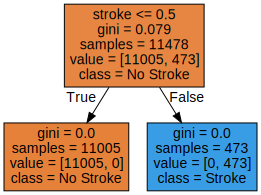

In [413]:
# 트리 시각화
import graphviz
with open('tree.model')as f:
    data = f.read()
graphviz.Source(data)

In [426]:
# 예측 및 평가
model.score(X_test, y_test)

1.0

In [427]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
12100,26.0,0,0,84.86,28.4,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
10072,51.0,0,0,90.28,31.5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4397,49.0,0,0,81.51,29.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3477,44.0,0,0,82.37,37.1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
12121,59.0,0,0,76.51,29.0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,63.0,0,0,85.00,26.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5987,54.0,0,0,116.44,43.8,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1219,51.0,0,0,105.60,57.1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4417,56.0,0,0,88.33,26.0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [415]:
!pip install bayesian-optimization==1.4.2

In [89]:
# 베이지안 최적화 실행
from bayes_opt import BayesianOptimization

In [90]:
# 파라미터 구성
DecisionTreeClassifier()
param_bound = {
        'min_samples_split' : (2, 5),       # 내부 노드를 분할하는 데 필요한 최소 샘플 수의 범위
        'min_samples_leaf'  : (2, 5),       # 리프 노드에 필요한 최소 샘플 수의 범위
        'max_depth'         : (2, 10),      # 트리의 최대 깊이
        'max_leaf_nodes'    : (2, 100)      # 허용된 최대 리프 노드 수
}

In [91]:
# 함수 및 알고리즘 생성후 평가까지
def stroke(min_samples_split, min_samples_leaf, max_depth, max_leaf_nodes):

    model = DecisionTreeClassifier(
                min_samples_split=int(min_samples_split),
                min_samples_leaf=int(min_samples_leaf),
                max_depth=int(max_depth),
                max_leaf_nodes=int(max_leaf_nodes)
)
    model.fit(X_train, y_train)

    return model.score(X_test, y_test)

In [92]:
# 최적화
optimizer = BayesianOptimization(f=stroke, pbounds = param_bound)
optimizer.maximize(init_points = 10, n_iter = 100, xi = 0.01)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... |
-------------------------------------------------------------------------
| 1         | 0.9587    | 9.847     | 22.13     | 3.08      | 4.221     |
| 2         | 0.9587    | 8.298     | 30.3      | 3.218     | 3.783     |
| 3         | 0.9587    | 2.221     | 56.42     | 3.546     | 3.188     |
| 4         | 0.9587    | 2.23      | 23.64     | 4.165     | 4.52      |
| 5         | 0.9587    | 4.651     | 93.97     | 2.666     | 4.581     |
| 6         | 0.9587    | 6.902     | 9.242     | 2.27      | 3.337     |
| 7         | 0.9587    | 7.061     | 40.11     | 2.226     | 4.906     |
| 8         | 0.9587    | 5.849     | 12.23     | 3.841     | 4.006     |
| 9         | 0.9587    | 6.748     | 57.33     | 3.671     | 2.401     |
| 10        | 0.9587    | 6.619     | 73.11     | 2.545     | 2.64      |
| 11        | 0.9587    | 4.107     | 40.29     | 4.542     | 3.657     |


<ipython-input-92-c6ee1b3f891d>:3: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  optimizer.maximize(init_points = 10, n_iter = 100, xi = 0.01)


| 12        | 0.9587    | 9.475     | 99.98     | 2.534     | 4.919     |
| 13        | 0.9587    | 9.821     | 99.88     | 4.152     | 2.586     |
| 14        | 0.9587    | 2.131     | 99.75     | 2.208     | 2.489     |
| 15        | 0.9587    | 9.785     | 2.134     | 3.026     | 4.932     |
| 16        | 0.9587    | 9.246     | 99.95     | 4.809     | 2.166     |
| 17        | 0.9587    | 2.64      | 2.101     | 4.968     | 2.085     |
| 18        | 0.9587    | 2.038     | 99.81     | 3.288     | 4.318     |
| 19        | 0.9587    | 6.778     | 73.64     | 4.036     | 3.154     |
| 20        | 0.9587    | 3.476     | 31.56     | 3.856     | 3.753     |
| 21        | 0.9587    | 7.202     | 27.44     | 3.612     | 3.853     |
| 22        | 0.9587    | 8.412     | 45.65     | 3.085     | 3.483     |
| 23        | 0.9587    | 3.978     | 44.27     | 4.869     | 2.643     |
| 24        | 0.9587    | 2.759     | 46.23     | 3.532     | 2.49      |
| 25        | 0.9587    | 2.062     | 

In [75]:
# 테스트 데이터 평가
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba( X_test )[ :, 1]

roc_auc_score(y_test ,y_pred)

0.8750483138467484

In [ ]:
y_pred_submission = model.predict_proba( np.array(test_data.age).reshape(-1,1) )[:, 1]
# 값을 세팅
submission['stroke'] = y_pred_submission
# kaggle에 제출할 파일 생성
submission.to_csv( 'submission_test2.csv', index=False )

In [ ]:
submission

,stroke
id,
15304,0.048193
15305,0.190476
15306,0.000000
15307,0.009756
15308,0.014851
...,...
25503,0.000000
25504,0.009756
25505,0.000000
